In [1]:
import pandas as pd
import numpy as np

In [2]:
evaluation_dataset_path_1 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-21_18-31-20/evaluation_dataset.json"
df_eval_1 = pd.read_json(evaluation_dataset_path_1)
df_eval_1["experiment_name"] = "baseline_v1.0_gemini-2.0-flash"
df_eval_1["evaluation_timestamp"] = "ev_2025-04-21_18-31-20"

evaluation_dataset_path_2 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-23_11-26-44/evaluation_dataset.json"
df_eval_2 = pd.read_json(evaluation_dataset_path_2)
df_eval_2["experiment_name"] = "sparql_construction_v1.1_gemini-2.0-flash"
df_eval_2["evaluation_timestamp"] = "ev_2025-04-23_11-26-44"

evaluation_dataset_path_3 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_02-04-22/evaluation_dataset.json"
df_eval_3 = pd.read_json(evaluation_dataset_path_3)
df_eval_3["experiment_name"] = "baseline_v1.0_gemini-2.5-flash"
df_eval_3["evaluation_timestamp"] = "ev_2025-04-22_02-04-22"

evaluation_dataset_path_4 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_16-27-37/evaluation_dataset.json"
df_eval_4 = pd.read_json(evaluation_dataset_path_4)
df_eval_4["experiment_name"] = "sparql_construction_v1.1_gemini-2.5-flash"
df_eval_4["evaluation_timestamp"] = "ev_2025-04-22_16-27-37"

evaluation_dataset_path_5 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_17-38-49/evaluation_dataset.json"
df_eval_5 = pd.read_json(evaluation_dataset_path_5)
df_eval_5["experiment_name"] = "cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash"
df_eval_5["evaluation_timestamp"] = "ev_2025-04-22_17-38-49"

evaluation_dataset_path_6 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_19-28-07/evaluation_dataset.json"
df_eval_6 = pd.read_json(evaluation_dataset_path_6)
df_eval_6["experiment_name"] = "cot_vanilla_v1.0_construction_v1.0_gemini-2.0-flash"
df_eval_6["evaluation_timestamp"] = "ev_2025-04-22_19-28-07"

evaluation_dataset_path_7 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_21-44-48/evaluation_dataset.json"
df_eval_7 = pd.read_json(evaluation_dataset_path_7)
df_eval_7["experiment_name"] = "cot_vanilla_v1.0_construction_v1.1_gemini-2.0-flash"
df_eval_7["evaluation_timestamp"] = "ev_2025-04-22_21-44-48"

evaluation_dataset_path_8 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-23_10-26-29/evaluation_dataset.json"
df_eval_8 = pd.read_json(evaluation_dataset_path_8)
df_eval_8["experiment_name"] = "cot_vanilla_v1.0_construction_v1.1_gemini-2.5-flash"
df_eval_8["evaluation_timestamp"] = "ev_2025-04-23_10-26-29"

evaluation_dataset_path_9 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-25_16-58-55/evaluation_dataset.json"
df_eval_9 = pd.read_json(evaluation_dataset_path_9)
df_eval_9["experiment_name"] = "cot_vanilla_v1.0_construction_v1.1_gemini-2.0-flash_temp_0.1"
df_eval_9["evaluation_timestamp"] = "ev_2025-04-25_16-58-55"

evaluation_dataset_path_10 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-25_17-49-29/evaluation_dataset.json"
df_eval_10 = pd.read_json(evaluation_dataset_path_10)
df_eval_10["experiment_name"] = "sparql_construction_v1.1_gemini-2.0-flash_temp_0.1"
df_eval_10["evaluation_timestamp"] = "ev_2025-04-25_17-49-29"

# evaluation_dataset_path_11 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-26_16-52-04/evaluation_dataset.json"
# df_eval_11 = pd.read_json(evaluation_dataset_path_11)
# df_eval_11["experiment_name"] = "cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1"
# df_eval_11["evaluation_timestamp"] = "ev_2025-04-26_16-52-04"

evaluation_dataset_path_11 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-27_17-31-27/evaluation_dataset.json"
df_eval_11 = pd.read_json(evaluation_dataset_path_11)
df_eval_11["experiment_name"] = "cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1"
df_eval_11["evaluation_timestamp"] = "ev_2025-04-27_17-31-27"

evaluation_dataset_path_12 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-26_18-21-19/evaluation_dataset.json"
df_eval_12 = pd.read_json(evaluation_dataset_path_12)
df_eval_12["experiment_name"] = "cot_vanilla_v1.0_construction_v1.1_gemini-2.5-flash_temp_0.1"
df_eval_12["evaluation_timestamp"] = "ev_2025-04-26_18-21-19"


evaluation_dataset_path_13 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-27_15-06-28/evaluation_dataset.json"
df_eval_13 = pd.read_json(evaluation_dataset_path_13)
df_eval_13["experiment_name"] = "cot-few-shot_v1.0_gemini-2.5-flash_temp_0.1"
df_eval_13["evaluation_timestamp"] = "ev_2025-04-27_15-06-28"

evaluation_dataset_path_14 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-27_16-18-37/evaluation_dataset.json"
df_eval_14 = pd.read_json(evaluation_dataset_path_14)
df_eval_14["experiment_name"] = "cot-few-shot_v1.0_gemini-2.5-flash_thinking_temp_0.1"
df_eval_14["evaluation_timestamp"] = "ev_2025-04-27_16-18-37"



df = pd.concat([df_eval_1, df_eval_2, df_eval_3, df_eval_4, df_eval_5, df_eval_6, df_eval_7, df_eval_8, df_eval_9, df_eval_10, df_eval_11, df_eval_12, df_eval_13, df_eval_14], ignore_index=True)

df["validity_flag"] = np.where(df["is_valid_sparql"], "valid", "invalid")


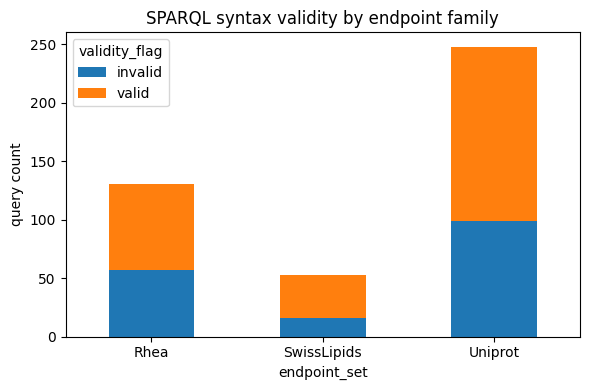

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

ct = df.groupby(["endpoint_set", "validity_flag"]).size().unstack(fill_value=0)
ct.plot(kind="bar", stacked=True, figsize=(6,4))
plt.ylabel("query count")
plt.title("SPARQL syntax validity by endpoint family")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [8]:
valid_counts = (
    df.groupby("experiment_name")["is_valid_sparql"]
            .agg(total="size", n_valid="sum")
            .reset_index()
            .sort_values("n_valid")
)

print(valid_counts)

                                      experiment_name  total  n_valid
0                      baseline_v1.0_gemini-2.0-flash     32        0
5      cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash     32        0
6   cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...     32       13
7   cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...     32       16
12  sparql_construction_v1.1_gemini-2.0-flash_temp...     32       16
2         cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1     27       22
4   cot-few-shot_v1.0_gemini-2.5-flash_thinking_te...     28       22
8   cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...     32       23
11          sparql_construction_v1.1_gemini-2.0-flash     32       23
1                      baseline_v1.0_gemini-2.5-flash     32       24
3         cot-few-shot_v1.0_gemini-2.5-flash_temp_0.1     28       24
13          sparql_construction_v1.1_gemini-2.5-flash     31       24
9   cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...     31       26
10  cot_vanilla_v1.0

/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_32842/1400190658.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experiment_name", y="n_valid", data=valid_counts, palette="Blues_d")


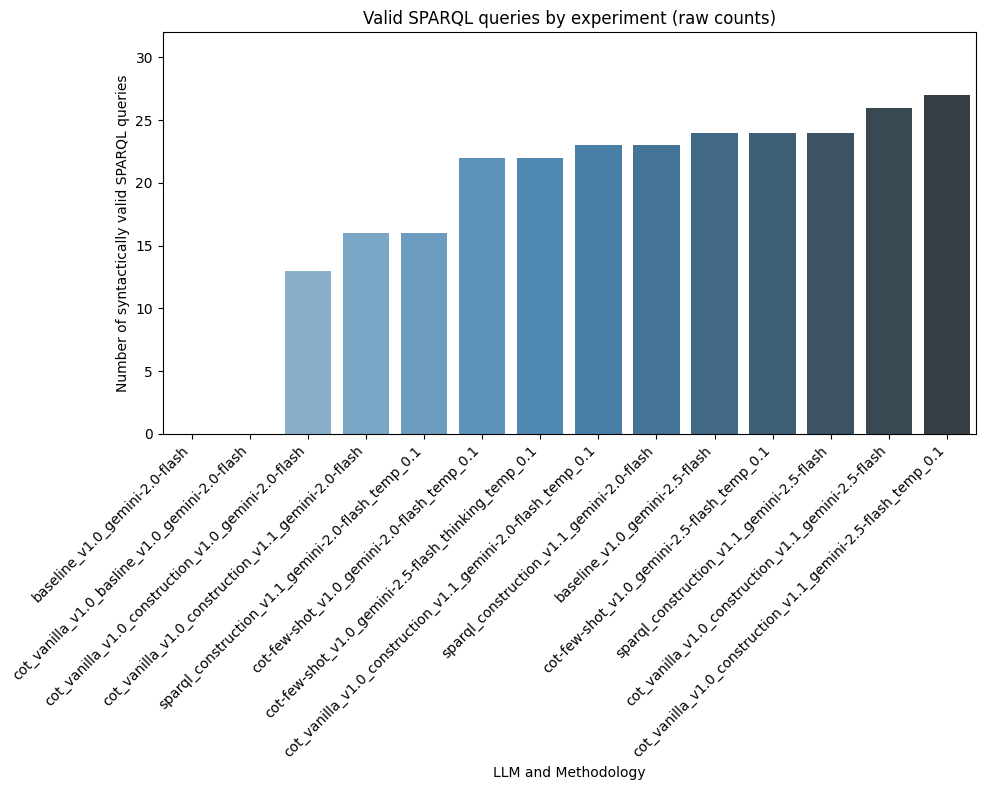

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.barplot(x="experiment_name", y="n_valid", data=valid_counts, palette="Blues_d")
plt.ylabel("Number of syntactically valid SPARQL queries")
plt.title("Valid SPARQL queries by experiment (raw counts)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel("LLM and Methodology")
plt.tight_layout()
plt.ylim(0,32)
plt.show()

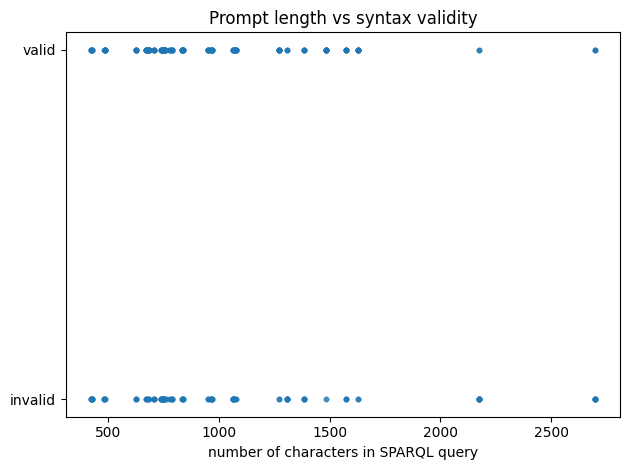

In [10]:
plt.scatter(df["ground_truth_query"].str.len(),
            df["is_valid_sparql"].astype(int),
            alpha=0.5, s=10)
plt.yticks([0,1], ["invalid","valid"])
plt.xlabel("number of characters in SPARQL query")
plt.title("Prompt length vs syntax validity")
plt.tight_layout()
plt.show()


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_32842/755679332.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


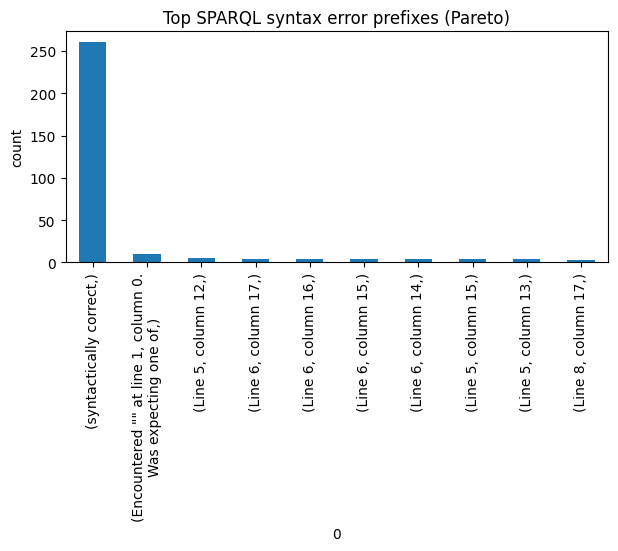

In [11]:
syntax_df = df[df["sparql_syntax_error"].notna()]
top_err = (syntax_df["sparql_syntax_error"]
           .str.extract(r"^([^:]+)")        # substring before first colon
           .value_counts()
           .head(10))
top_err.plot(kind="bar", figsize=(7,3))
plt.ylabel("count")
plt.title("Top SPARQL syntax error prefixes (Pareto)")
plt.tight_layout()
plt.show()


In [12]:
df_eval_14["error_occured_at_endpoint_message"]

0                                              no error
1                                              no error
2                          The read operation timed out
3                            no error, but empty result
4                          The read operation timed out
5     QueryBadFormed: A bad request has been sent to...
6                             syntactically not correct
7                             syntactically not correct
8                            no error, but empty result
9                            no error, but empty result
10                            syntactically not correct
11                           no error, but empty result
12                         The read operation timed out
13                                             no error
14    QueryBadFormed: A bad request has been sent to...
15                           no error, but empty result
16                            syntactically not correct
17                           no error, but empty

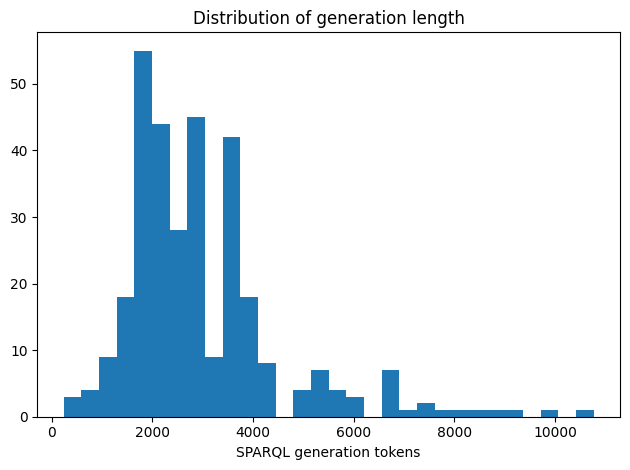

In [13]:
plt.hist(df["sparql_construction_total_tokens"], bins=30)
plt.xlabel("SPARQL generation tokens")
plt.title("Distribution of generation length")
plt.tight_layout()
plt.show()


In [14]:
valid_summary = (
    df.groupby("experiment_name")["is_valid_sparql"]
            .agg(total="size", n_valid="sum")
            .assign(syntactically_valid=lambda x: 100 * x.n_valid / x.total)
            .reset_index()
            .sort_values("syntactically_valid")
)

print(valid_summary)

                                      experiment_name  total  n_valid  \
0                      baseline_v1.0_gemini-2.0-flash     32        0   
5      cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash     32        0   
6   cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...     32       13   
7   cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...     32       16   
12  sparql_construction_v1.1_gemini-2.0-flash_temp...     32       16   
8   cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...     32       23   
11          sparql_construction_v1.1_gemini-2.0-flash     32       23   
1                      baseline_v1.0_gemini-2.5-flash     32       24   
13          sparql_construction_v1.1_gemini-2.5-flash     31       24   
4   cot-few-shot_v1.0_gemini-2.5-flash_thinking_te...     28       22   
2         cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1     27       22   
9   cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...     31       26   
3         cot-few-shot_v1.0_gemini-2.5-flash_temp_0

/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_32842/2109133886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experiment_name", y="syntactically_valid", data=valid_summary, palette="Blues_d")


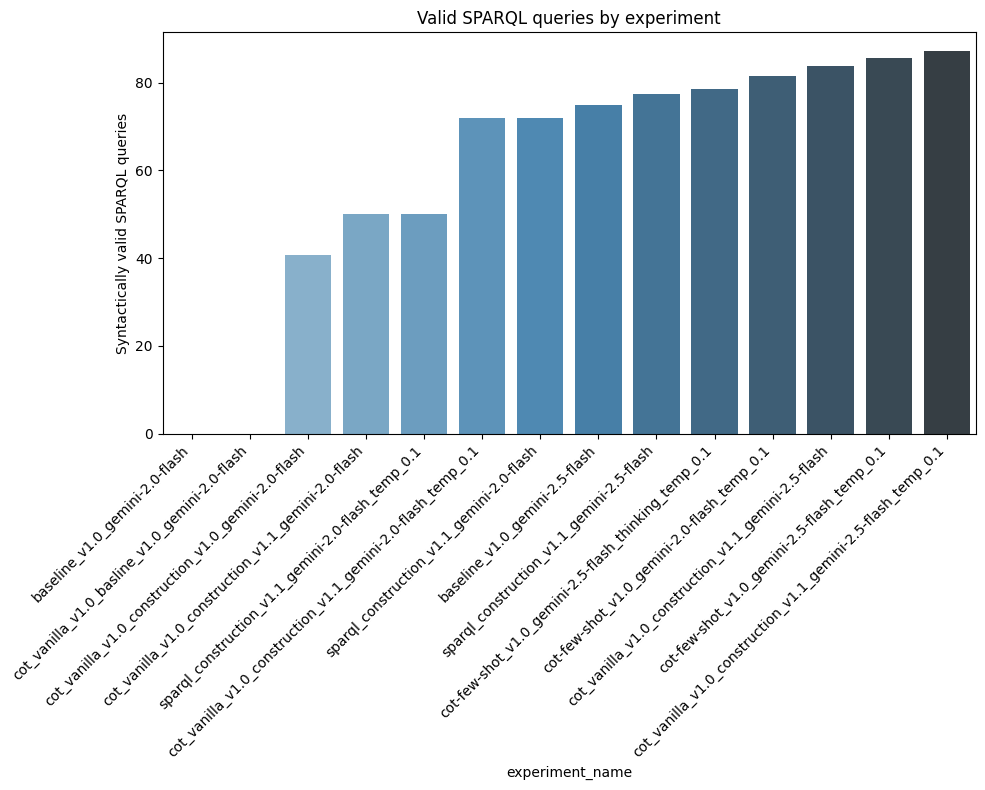

In [15]:
plt.figure(figsize=(10, 8))
sns.barplot(x="experiment_name", y="syntactically_valid", data=valid_summary, palette="Blues_d")
plt.ylabel("Syntactically valid SPARQL queries")
plt.title("Valid SPARQL queries by experiment")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [16]:
valid_summary = (
    df.groupby("experiment_name")["error_occured_at_endpoint"]
            .agg(total="size", n_valid="sum")
            .assign(error_occured_at_endpoint=lambda x: 100 * x.n_valid / x.total)
            .reset_index()
            .sort_values("error_occured_at_endpoint", ascending=False)
)

print(valid_summary)

                                      experiment_name  total  n_valid  \
0                      baseline_v1.0_gemini-2.0-flash     32       32   
5      cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash     32       32   
7   cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...     32       25   
6   cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...     32       23   
13          sparql_construction_v1.1_gemini-2.5-flash     31       21   
1                      baseline_v1.0_gemini-2.5-flash     32       19   
9   cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...     31       15   
10  cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...     31       11   
3         cot-few-shot_v1.0_gemini-2.5-flash_temp_0.1     28        9   
4   cot-few-shot_v1.0_gemini-2.5-flash_thinking_te...     28        9   
8   cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...     32       10   
11          sparql_construction_v1.1_gemini-2.0-flash     32        8   
2         cot-few-shot_v1.0_gemini-2.0-flash_temp_0

/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_32842/3229745019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="experiment_name", y="error_occured_at_endpoint", data=valid_summary, palette="Blues_d")


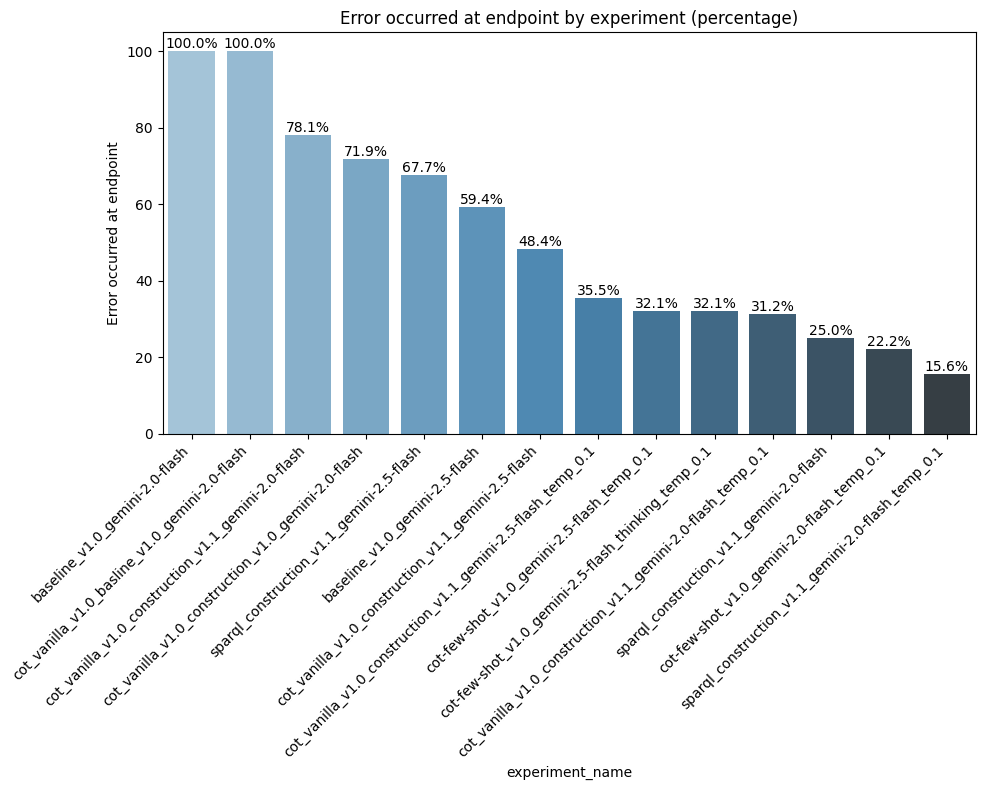

In [17]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="experiment_name", y="error_occured_at_endpoint", data=valid_summary, palette="Blues_d")
plt.ylabel("Error occurred at endpoint")
plt.title("Error occurred at endpoint by experiment (percentage)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Add percentage labels manually
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.show()

In [18]:
valid_summary = (
    df
    .groupby("experiment_name")
    .agg(
        total=("error_occured_at_endpoint_message", "size"),
        n_valid=("error_occured_at_endpoint_message", lambda x: (x == "no error, but empty result").sum())
    )
    .reset_index()
    .sort_values("n_valid", ascending=False)  # Sort from most to least
)

print(valid_counts)

                                      experiment_name  total  n_valid
0                      baseline_v1.0_gemini-2.0-flash     32        0
5      cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash     32        0
6   cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...     32       13
7   cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...     32       16
12  sparql_construction_v1.1_gemini-2.0-flash_temp...     32       16
2         cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1     27       22
4   cot-few-shot_v1.0_gemini-2.5-flash_thinking_te...     28       22
8   cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...     32       23
11          sparql_construction_v1.1_gemini-2.0-flash     32       23
1                      baseline_v1.0_gemini-2.5-flash     32       24
3         cot-few-shot_v1.0_gemini-2.5-flash_temp_0.1     28       24
13          sparql_construction_v1.1_gemini-2.5-flash     31       24
9   cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...     31       26
10  cot_vanilla_v1.0

In [19]:
# Count how many times each message appears per experiment
valid_counts = (
    df
    .groupby(["experiment_name", "error_occured_at_endpoint_message"])
    .size()
    .reset_index(name='count')
)
valid_counts = valid_counts.sort_values("count", ascending=True)
valid_counts = valid_counts[valid_counts["error_occured_at_endpoint_message"] == "no error, but empty result"]

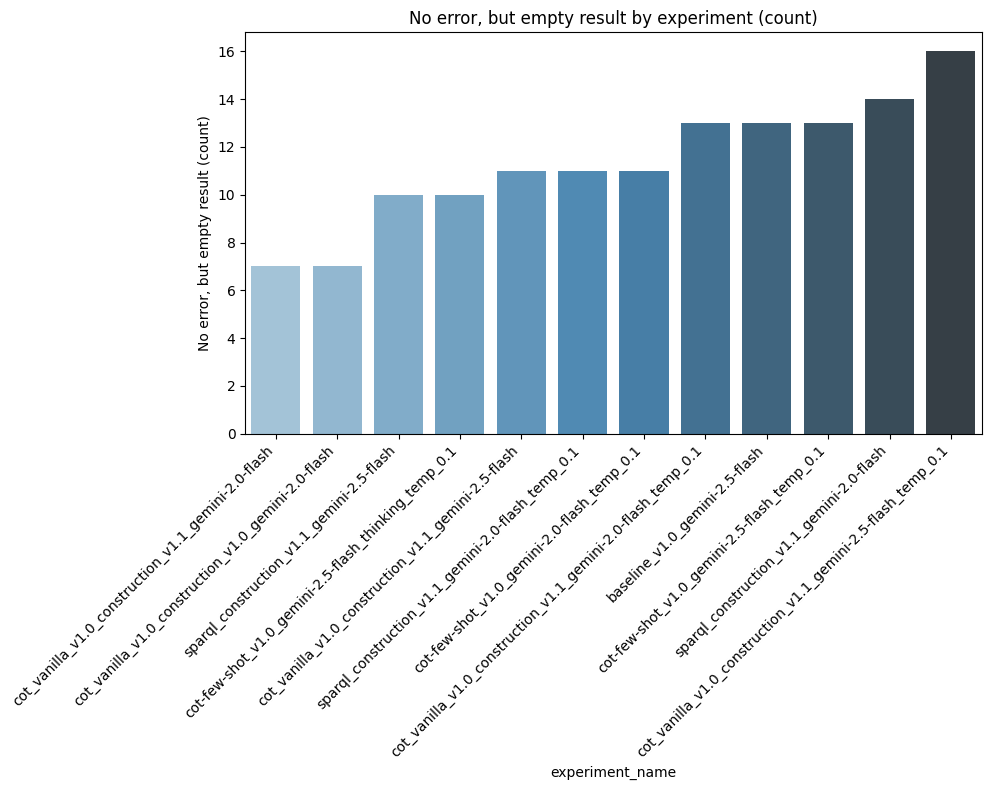

In [20]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x="experiment_name",
    y="count",
    hue="experiment_name",        # add this line
    data=valid_counts,
    palette="Blues_d",
    legend=False                  # add this line
)
plt.ylabel("No error, but empty result (count)")
plt.title("No error, but empty result by experiment (count)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [21]:
df_error = df[df["is_valid_sparql"] == True]

# Total error count per experiment
total_errors = (
    df_error
    .groupby("experiment_name")
    .size()
    .reset_index(name="total_errors_on_endpoint")
)

# "No error, but empty result" count per experiment
empty_result_counts = (
    df_error[df_error["error_occured_at_endpoint_message"] == "no error, but empty result"]
    .groupby("experiment_name")
    .size()
    .reset_index(name="empty_result_count")
)


# Merge the two counts
summary = pd.merge(total_errors, empty_result_counts, on="experiment_name", how="left")
summary["empty_result_count"] = summary["empty_result_count"].fillna(0)



# Calculate percentage
summary["percentage_empty_result"] = summary["empty_result_count"] / summary["total_errors_on_endpoint"] * 100

summary.head()


,experiment_name,total_errors_on_endpoint,empty_result_count,percentage_empty_result
0,baseline_v1.0_gemini-2.5-flash,24,13,54.166667
1,cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1,22,11,50.000000
2,cot-few-shot_v1.0_gemini-2.5-flash_temp_0.1,24,13,54.166667
3,cot-few-shot_v1.0_gemini-2.5-flash_thinking_te...,22,10,45.454545
4,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,13,7,53.846154


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_32842/1922915137.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


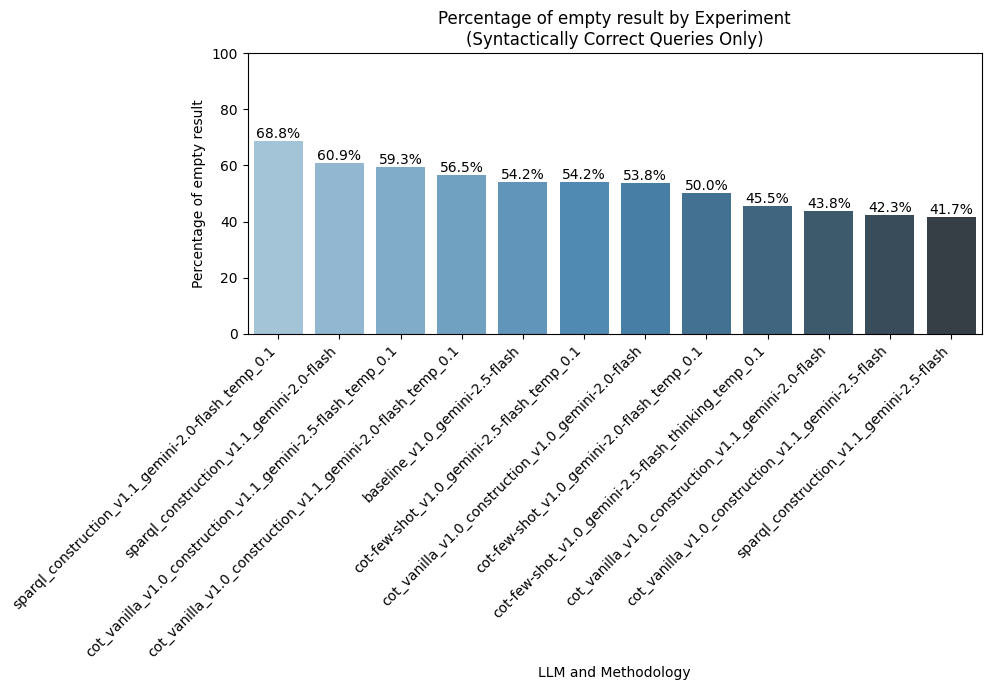

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by percentage for a clearer plot
summary_sorted = summary.sort_values("percentage_empty_result", ascending=False)

plt.figure(figsize=(10, 7))
ax = sns.barplot(
    x="experiment_name",
    y="percentage_empty_result",
    data=summary_sorted,
    palette="Blues_d"
)
plt.ylabel('Percentage of empty result')
plt.xlabel('LLM and Methodology')
plt.title('Percentage of empty result by Experiment\n(Syntactically Correct Queries Only)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Optionally annotate bars with the percentage
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

In [23]:
df_valid_at_endpoint = df[(df["is_valid_sparql"] == True) & (df["error_occured_at_endpoint"] == False)]

df_error = df[df["is_valid_sparql"] == True]

# Total error count per experiment
total_errors = (
    df_error
    .groupby("experiment_name")
    .size()
    .reset_index(name="total_errors_on_endpoint")
)

total_valid_at_endpoint = (
    df_valid_at_endpoint
    .groupby("experiment_name")
    .size()
    .reset_index(name="total_valid_at_endpoint")
)

# Merge the two counts
summary = pd.merge(total_errors, total_valid_at_endpoint, on="experiment_name", how="left")



# Calculate percentage
summary["percentage_valid_at_endpoint"] = summary["total_valid_at_endpoint"] / summary["total_errors_on_endpoint"] * 100

summary.head()

,experiment_name,total_errors_on_endpoint,total_valid_at_endpoint,percentage_valid_at_endpoint
0,baseline_v1.0_gemini-2.5-flash,24,13,54.166667
1,cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1,22,16,72.727273
2,cot-few-shot_v1.0_gemini-2.5-flash_temp_0.1,24,15,62.500000
3,cot-few-shot_v1.0_gemini-2.5-flash_thinking_te...,22,13,59.090909
4,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,13,9,69.230769


In [24]:
total_valid_at_endpoint.head()

,experiment_name,total_valid_at_endpoint
0,baseline_v1.0_gemini-2.5-flash,13
1,cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1,16
2,cot-few-shot_v1.0_gemini-2.5-flash_temp_0.1,15
3,cot-few-shot_v1.0_gemini-2.5-flash_thinking_te...,13
4,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,9


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_32842/182583925.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


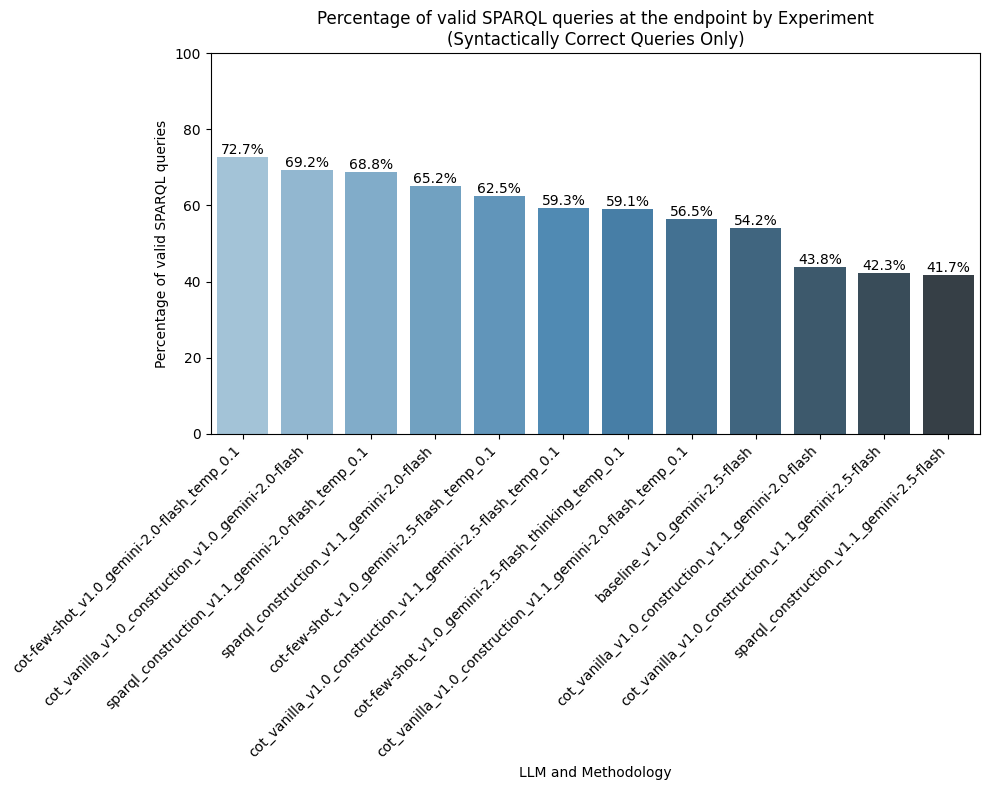

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by percentage for a clearer plot
summary_sorted = summary.sort_values("percentage_valid_at_endpoint", ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x="experiment_name",
    y="percentage_valid_at_endpoint",
    data=summary_sorted,
    palette="Blues_d"
    
)
plt.ylabel('Percentage of valid SPARQL queries')
plt.xlabel('LLM and Methodology')
plt.title('Percentage of valid SPARQL queries at the endpoint by Experiment\n(Syntactically Correct Queries Only)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)

# Optionally annotate bars with the percentage
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

In [26]:
target_endpoint_summary = (
    df.groupby("experiment_name")["predicted_endpoint_equal_to_target_endpoint"]
            .agg(total="size", n_valid="sum")
            .assign(predicted_endpoint_equal_to_target_endpoint=lambda x: 100 * x.n_valid / x.total)
            .reset_index()
            .sort_values("predicted_endpoint_equal_to_target_endpoint", ascending=True)
)

In [27]:
target_endpoint_summary

,experiment_name,total,n_valid,predicted_endpoint_equal_to_target_endpoint
0,baseline_v1.0_gemini-2.0-flash,32,6,18.750000
1,baseline_v1.0_gemini-2.5-flash,32,8,25.000000
5,cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash,32,14,43.750000
10,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,31,14,45.161290
13,sparql_construction_v1.1_gemini-2.5-flash,31,14,45.161290
9,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,31,15,48.387097
6,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,32,22,68.750000
7,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,32,22,68.750000
8,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,32,24,75.000000
2,cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1,27,21,77.777778


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_32842/976670890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


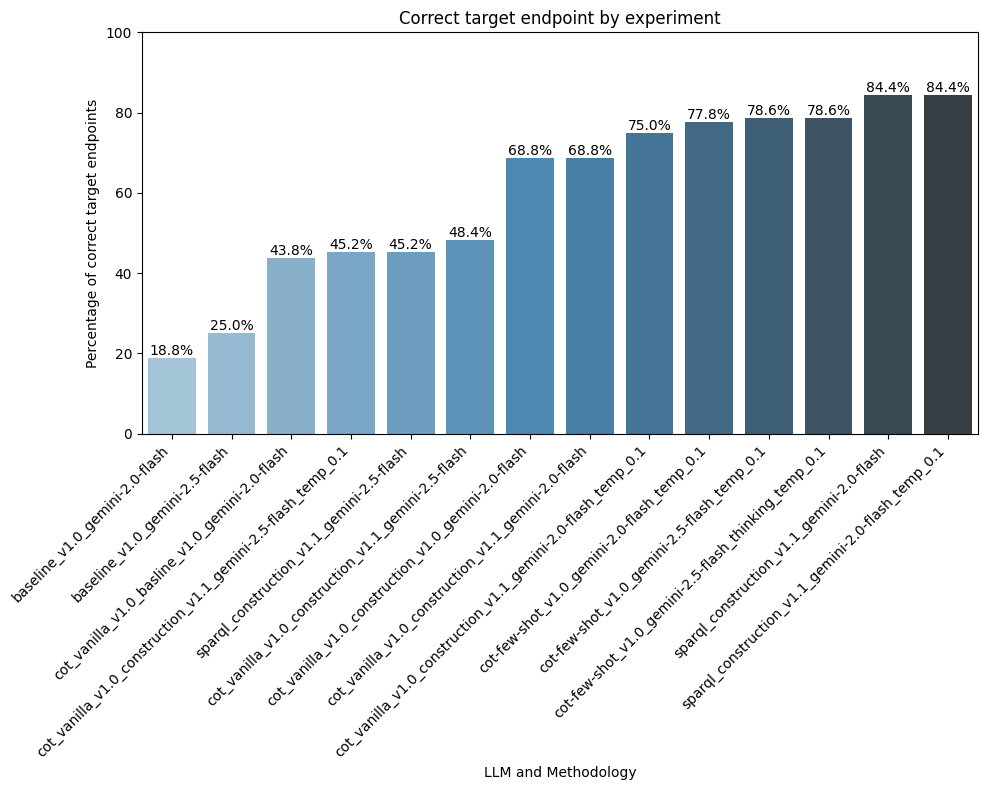

In [28]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x="experiment_name",
    y="predicted_endpoint_equal_to_target_endpoint",
    data=target_endpoint_summary,
    palette="Blues_d"
    
)
plt.ylabel('Percentage of correct target endpoints')
plt.xlabel('LLM and Methodology')
plt.title('Correct target endpoint by experiment')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)

# Optionally annotate bars with the percentage
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

In [29]:
target_endpoint_summary = (
    df.groupby("experiment_name")["predicted_endpoint_or_federated_endpoint"]
            .agg(total="size", n_valid="sum")
            .assign(predicted_endpoint_or_federated_endpoint=lambda x: 100 * x.n_valid / x.total)
            .reset_index()
            .sort_values("predicted_endpoint_or_federated_endpoint", ascending=True)
)

In [30]:
target_endpoint_summary.head()

,experiment_name,total,n_valid,predicted_endpoint_or_federated_endpoint
0,baseline_v1.0_gemini-2.0-flash,32,9,28.125000
1,baseline_v1.0_gemini-2.5-flash,32,14,43.750000
13,sparql_construction_v1.1_gemini-2.5-flash,31,19,61.290323
5,cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash,32,20,62.500000
9,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,31,20,64.516129


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_32842/2127437961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


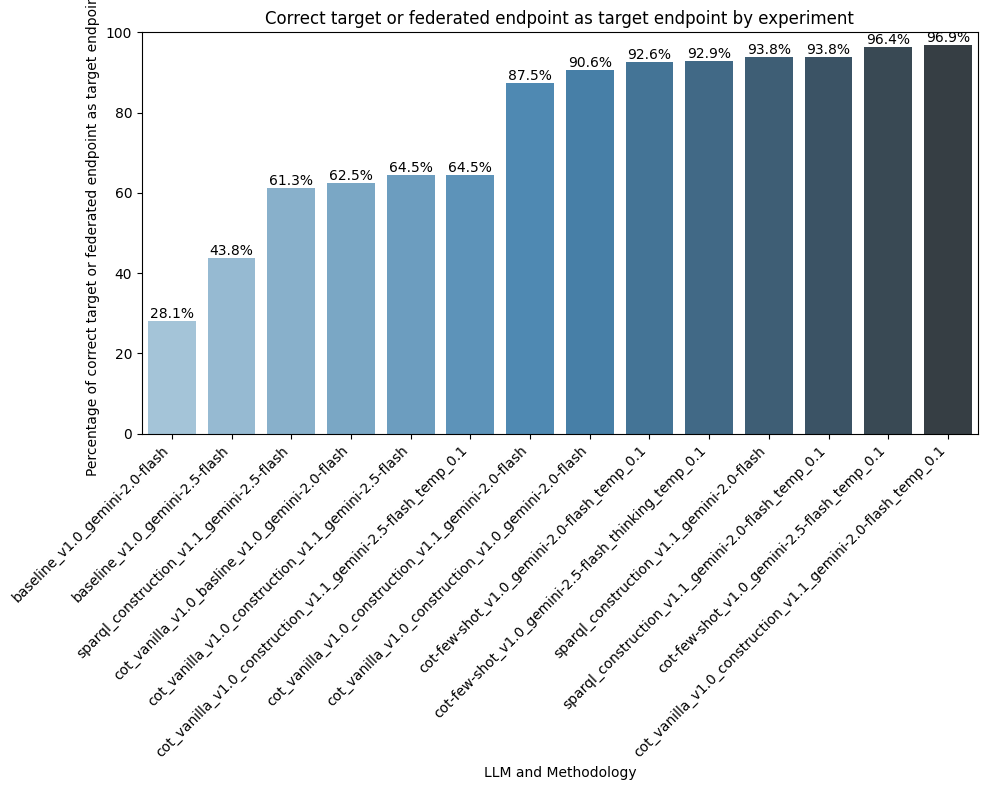

In [31]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x="experiment_name",
    y="predicted_endpoint_or_federated_endpoint",
    data=target_endpoint_summary,
    palette="Blues_d"
    
)
plt.ylabel('Percentage of correct target or federated endpoint as target endpoint')
plt.xlabel('LLM and Methodology')
plt.title('Correct target or federated endpoint as target endpoint by experiment')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)

# Optionally annotate bars with the percentage
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

In [32]:
df_error = df[df["is_valid_sparql"] == True]

# Total error count per experiment
total_errors = (
    df_error
    .groupby("experiment_name")
    .size()
    .reset_index(name="total_errors_on_endpoint")
)

# "No error, but empty result" count per experiment
empty_result_counts = (
    df_error[~(df_error["error_occured_at_endpoint_message"] == "no error, but empty result") & ~(df_error["error_occured_at_endpoint_message"] == "no error") & ~(df_error["error_occured_at_endpoint_message"] == "syntactically not correct")]
    .groupby(["experiment_name", "evaluation_timestamp"])
    .size()
    .reset_index(name="errors")
)

In [33]:
empty_result_counts

,experiment_name,evaluation_timestamp,errors
0,baseline_v1.0_gemini-2.5-flash,ev_2025-04-22_02-04-22,11
1,cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1,ev_2025-04-27_17-31-27,6
2,cot-few-shot_v1.0_gemini-2.5-flash_temp_0.1,ev_2025-04-27_15-06-28,9
3,cot-few-shot_v1.0_gemini-2.5-flash_thinking_te...,ev_2025-04-27_16-18-37,9
4,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,ev_2025-04-22_19-28-07,4
5,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,ev_2025-04-22_21-44-48,9
6,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,ev_2025-04-25_16-58-55,10
7,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,ev_2025-04-23_10-26-29,15
8,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,ev_2025-04-26_18-21-19,11
9,sparql_construction_v1.1_gemini-2.0-flash,ev_2025-04-23_11-26-44,8


In [34]:
filtered = df[df["evaluation_timestamp"] == "ev_2025-04-27_16-18-37"]

print(filtered["error_occured_at_endpoint_message"].unique())

print(filtered["error_occured_at_endpoint_message"])

['no error' 'The read operation timed out' 'no error, but empty result'
 'QueryBadFormed: A bad request has been sent to the endpoint: probably the SPARQL query is badly formed.'
 'syntactically not correct'
 '<urlopen error [Errno 8] nodename nor servname provided, or not known>']
404                                             no error
405                                             no error
406                         The read operation timed out
407                           no error, but empty result
408                         The read operation timed out
409    QueryBadFormed: A bad request has been sent to...
410                            syntactically not correct
411                            syntactically not correct
412                           no error, but empty result
413                           no error, but empty result
414                            syntactically not correct
415                           no error, but empty result
416                         The r

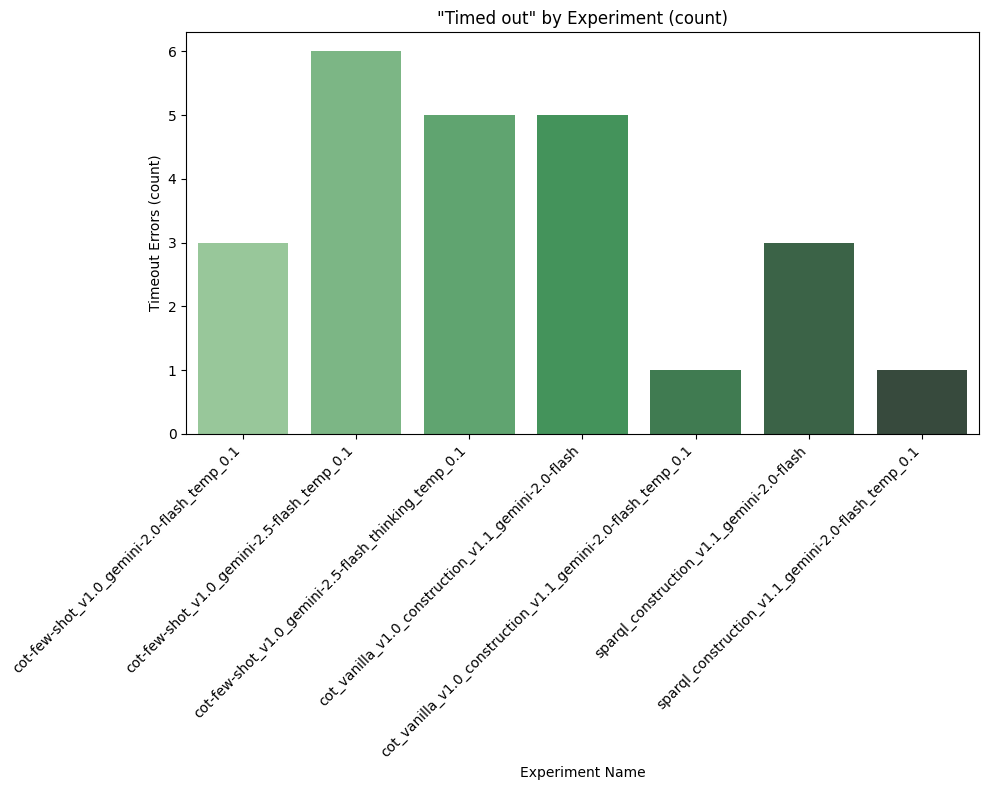

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boolean mask for the timeout error
timeout_mask = df["error_occured_at_endpoint_message"].str.contains("The read operation timed out", na=False)

# Group by experiment_name and count
timeout_counts = (
    df[timeout_mask]
    .groupby("experiment_name")
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(10, 8))
ax = sns.barplot(
    x="experiment_name",
    y="count",
    hue="experiment_name",        # color by experiment for clarity
    data=timeout_counts,
    palette="Greens_d",
    legend=False                  # no legend needed since x-axis is experiment_name
)
plt.ylabel('Timeout Errors (count)')
plt.xlabel('Experiment Name')
plt.title('"Timed out" by Experiment (count)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [37]:
import pandas as pd
import numpy as np

# 1. Filter for valid SPARQL queries
valid_df = df[df["is_valid_sparql"] == True].copy()

# 2. Classify error messages
valid_df["error_type"] = "Other QueryBadFormed errors"  # Default classification

# Apply classifications
empty_result_mask = valid_df["error_occured_at_endpoint_message"] == "no error, but empty result"
timeout_mask = valid_df["error_occured_at_endpoint_message"].str.contains("The read operation timed out", na=False)
no_error_mask = valid_df["error_occured_at_endpoint_message"] == "no error"

valid_df.loc[empty_result_mask, "error_type"] = "Empty Result"
valid_df.loc[timeout_mask, "error_type"] = "Timeout"
valid_df.loc[no_error_mask, "error_type"] = "No Error"

# 3. Group by experiment and error type to get counts
long_df = valid_df.groupby(["experiment_name", "error_type"]).size().reset_index(name="count")

# 4. Get total valid queries per experiment
total_per_exp = valid_df.groupby("experiment_name").size().reset_index(name="total")

# 5. Merge to calculate percentages
long_df = pd.merge(long_df, total_per_exp, on="experiment_name")
long_df["percentage"] = (long_df["count"] / long_df["total"]) * 100

# 6. Get unique experiments and error types for plotting
experiments = long_df["experiment_name"].unique()
error_types = long_df["error_type"].unique()

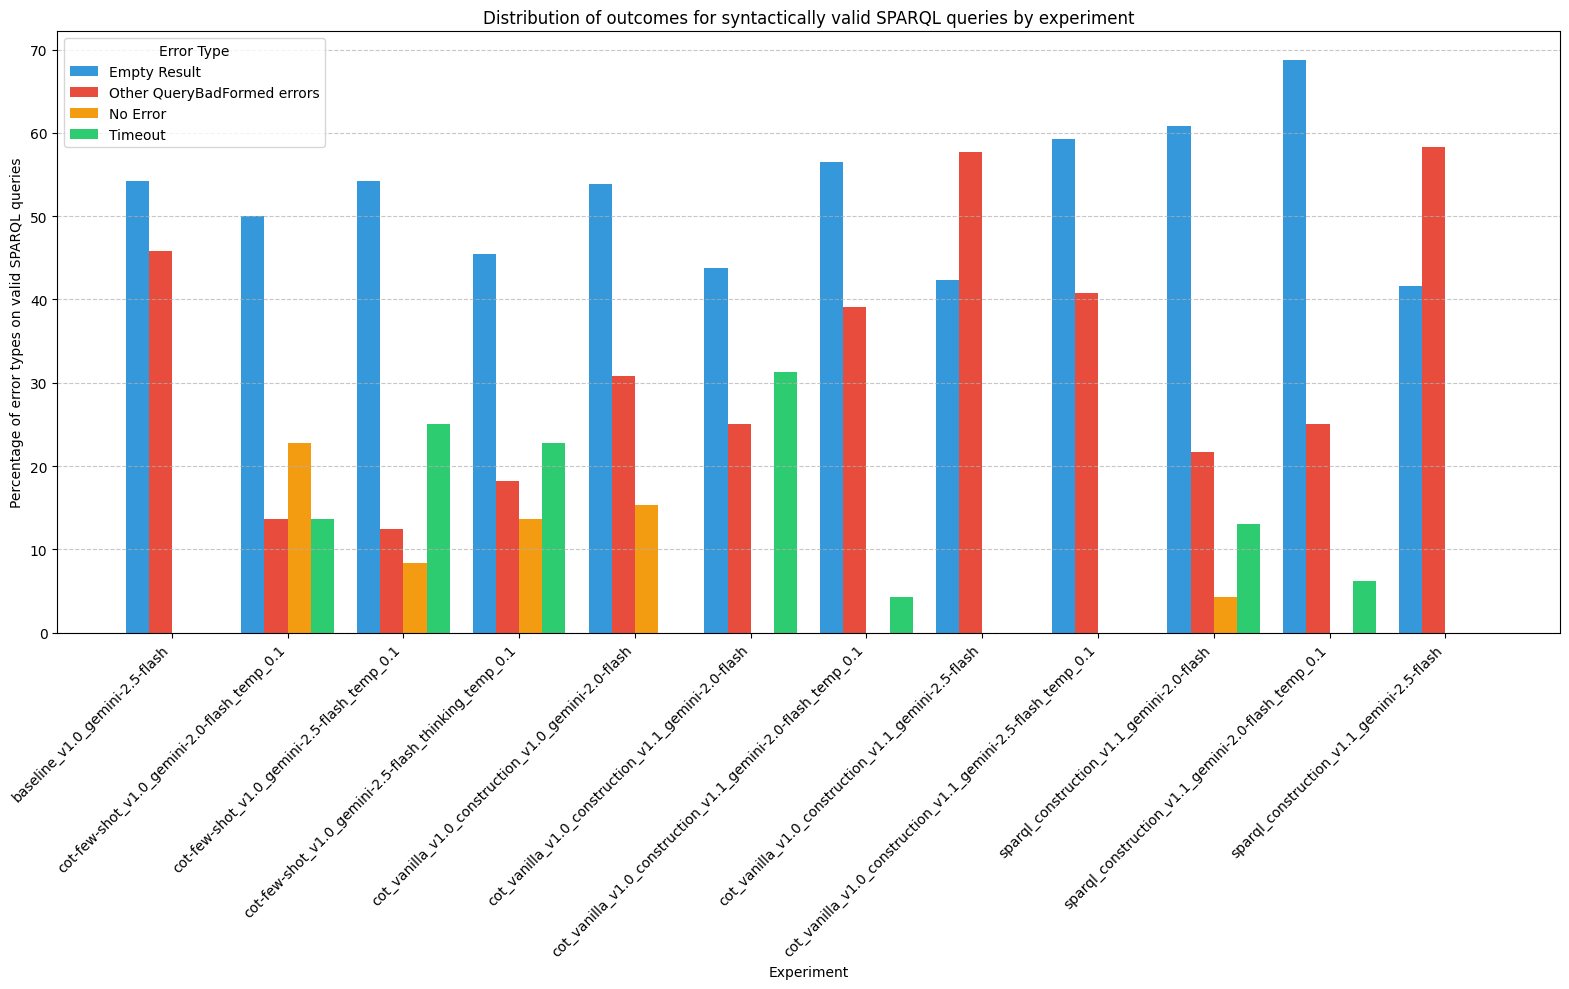

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

long_df = valid_df.groupby(["experiment_name", "error_type"]).size().reset_index(name="count")
total_per_exp = valid_df.groupby("experiment_name").size().reset_index(name="total")
long_df = pd.merge(long_df, total_per_exp, on="experiment_name")
long_df["percentage"] = (long_df["count"] / long_df["total"]) * 100

experiments = long_df["experiment_name"].unique()
error_types = long_df["error_type"].unique()

fig, ax = plt.subplots(figsize=(16, 10))

bar_width = 0.2
index = np.arange(len(experiments))

colors = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71']

for i, error_type in enumerate(error_types):
    error_data = long_df[long_df["error_type"] == error_type]
    error_dict = dict(zip(error_data["experiment_name"], error_data["percentage"]))
    percentages = [error_dict.get(exp, 0) for exp in experiments]
    ax.bar(index + i*bar_width, percentages, bar_width, label=error_type, color=colors[i % len(colors)])

ax.set_xlabel('Experiment')
ax.set_ylabel('Percentage of error types on valid SPARQL queries')
ax.set_title('Distribution of outcomes for syntactically valid SPARQL queries by experiment')
ax.set_xticks(index + bar_width * (len(error_types) - 1) / 2)
ax.set_xticklabels(experiments, rotation=45, ha='right')
ax.legend(title="Error Type")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

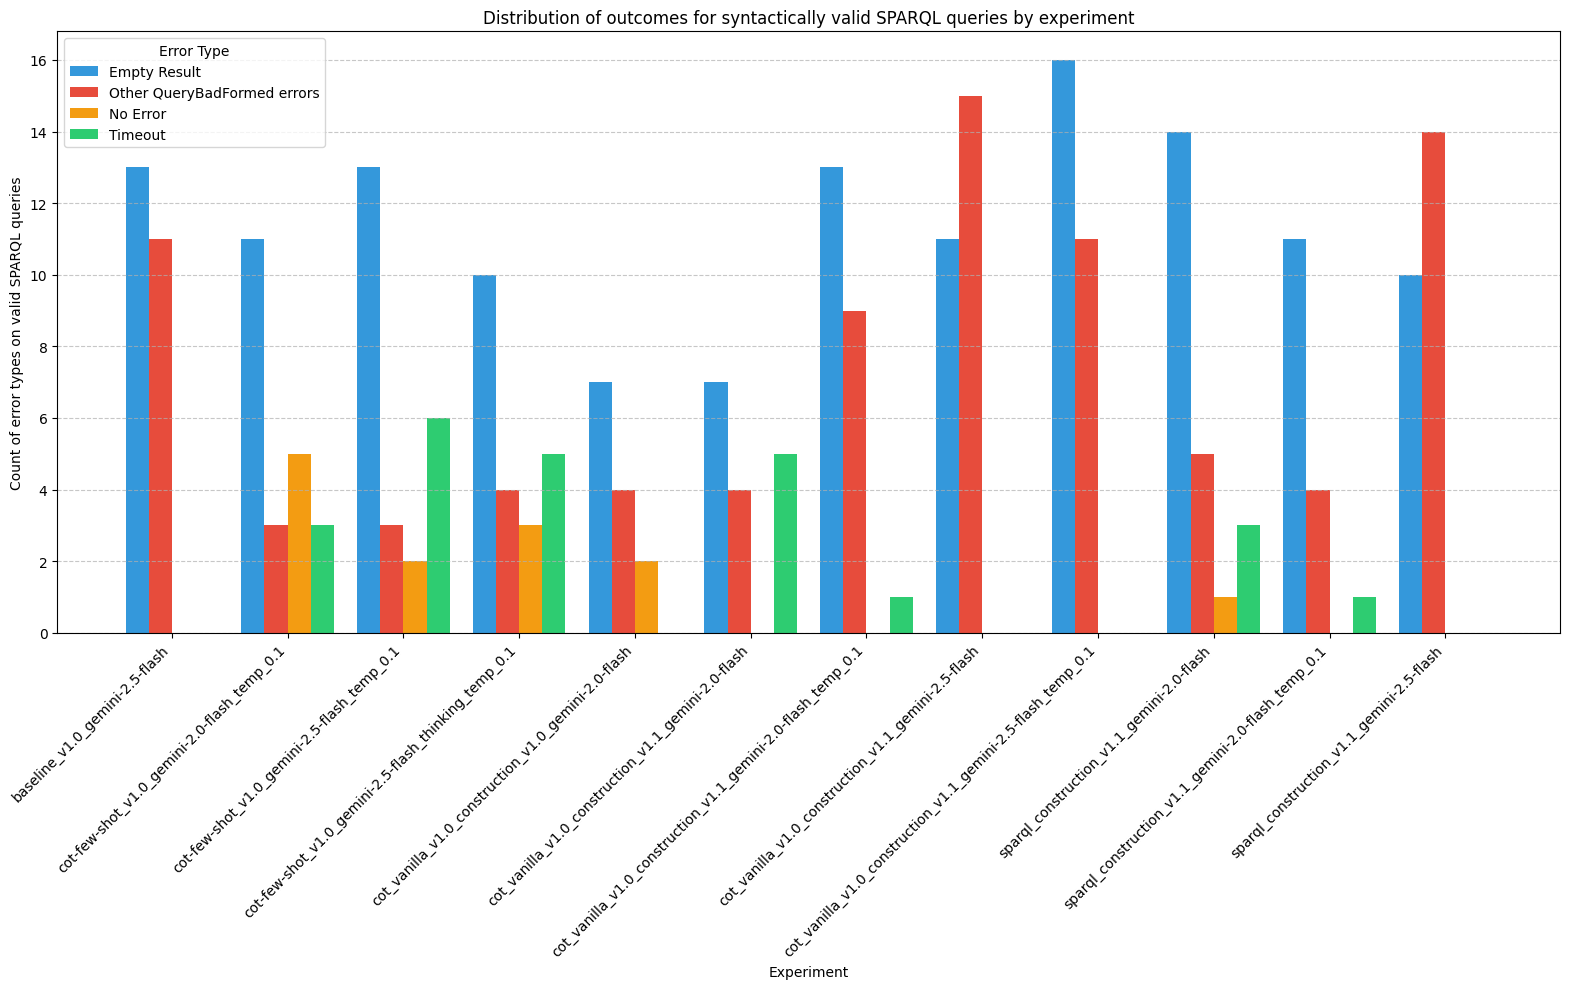

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the same valid_df with error_type classifications from before

# Group by experiment and error type to get counts (skip percentage calculation)
long_df = valid_df.groupby(["experiment_name", "error_type"]).size().reset_index(name="count")

# Get unique experiments and error types
experiments = long_df["experiment_name"].unique()
error_types = long_df["error_type"].unique()

# Set up the figure
fig, ax = plt.subplots(figsize=(16, 10))

# Set width of bars
bar_width = 0.2
index = np.arange(len(experiments))

# Colors for different error types
colors = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71']

# Plot bars for each error type
for i, error_type in enumerate(error_types):
    error_data = long_df[long_df["error_type"] == error_type]
    
    # Create a dictionary mapping experiment to count
    error_dict = dict(zip(error_data["experiment_name"], error_data["count"]))
    
    # Get counts in the same order as experiments
    counts = [error_dict.get(exp, 0) for exp in experiments]
    
    # Plot the bars
    ax.bar(index + i*bar_width, counts, bar_width, 
           label=error_type, color=colors[i % len(colors)])

# Add labels, title and legend
ax.set_xlabel('Experiment')
ax.set_ylabel('Count of error types on valid SPARQL queries')
ax.set_title('Distribution of outcomes for syntactically valid SPARQL queries by experiment')
ax.set_xticks(index + bar_width * (len(error_types) - 1) / 2)
ax.set_xticklabels(experiments, rotation=45, ha='right')
ax.legend(title="Error Type")
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a tight layout
plt.tight_layout()
plt.show()

In [47]:
import pandas as pd
import json

def read_metrics_as_df(path):
    with open(path, "r") as f:
        data = json.load(f)
    # If it's a dict (single row), wrap in a list for DataFrame construction
    if isinstance(data, dict):
        data = [data]
    return pd.DataFrame(data)


In [48]:

evaluation_dataset_path_1 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-21_18-31-20/metrics_dataset.json"
df_metrics_1 = read_metrics_as_df(evaluation_dataset_path_1)
df_metrics_1["experiment_name"] = "baseline_v1.0_gemini-2.0-flash"
df_metrics_1["evaluation_timestamp"] = "ev_2025-04-21_18-31-20"

evaluation_dataset_path_2 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-23_11-26-44/metrics_dataset.json"
df_metrics_2 = read_metrics_as_df(evaluation_dataset_path_2)
df_metrics_2["experiment_name"] = "sparql_construction_v1.1_gemini-2.0-flash"
df_metrics_2["evaluation_timestamp"] = "ev_2025-04-23_11-26-44"

evaluation_dataset_path_3 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_02-04-22/metrics_dataset.json"
df_metrics_3 = read_metrics_as_df(evaluation_dataset_path_3)
df_metrics_3["experiment_name"] = "baseline_v1.0_gemini-2.5-flash"
df_metrics_3["evaluation_timestamp"] = "ev_2025-04-22_02-04-22"

evaluation_dataset_path_4 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_16-27-37/metrics_dataset.json"
df_metrics_4 = read_metrics_as_df(evaluation_dataset_path_4)
df_metrics_4["experiment_name"] = "sparql_construction_v1.1_gemini-2.5-flash"
df_metrics_4["evaluation_timestamp"] = "ev_2025-04-22_16-27-37"

evaluation_dataset_path_5 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_17-38-49/metrics_dataset.json"
df_metrics_5 = read_metrics_as_df(evaluation_dataset_path_5)
df_metrics_5["experiment_name"] = "cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash"
df_metrics_5["evaluation_timestamp"] = "ev_2025-04-22_17-38-49"

evaluation_dataset_path_6 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_19-28-07/metrics_dataset.json"
df_metrics_6 = read_metrics_as_df(evaluation_dataset_path_6)
df_metrics_6["experiment_name"] = "cot_vanilla_v1.0_construction_v1.0_gemini-2.0-flash"
df_metrics_6["evaluation_timestamp"] = "ev_2025-04-22_19-28-07"

evaluation_dataset_path_7 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_21-44-48/metrics_dataset.json"
df_metrics_7 = read_metrics_as_df(evaluation_dataset_path_7)
df_metrics_7["experiment_name"] = "cot_vanilla_v1.0_construction_v1.1_gemini-2.0-flash"
df_metrics_7["evaluation_timestamp"] = "ev_2025-04-22_21-44-48"

evaluation_dataset_path_8 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-23_10-26-29/metrics_dataset.json"
df_metrics_8 = read_metrics_as_df(evaluation_dataset_path_8)
df_metrics_8["experiment_name"] = "cot_vanilla_v1.0_construction_v1.1_gemini-2.5-flash"
df_metrics_8["evaluation_timestamp"] = "ev_2025-04-23_10-26-29"

evaluation_dataset_path_9 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-25_16-58-55/metrics_dataset.json"
df_metrics_9 = read_metrics_as_df(evaluation_dataset_path_9)
df_metrics_9["experiment_name"] = "cot_vanilla_v1.0_construction_v1.1_gemini-2.0-flash_temp_0.1"
df_metrics_9["evaluation_timestamp"] = "ev_2025-04-25_16-58-55"

evaluation_dataset_path_10 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-25_17-49-29/metrics_dataset.json"
df_metrics_10 = read_metrics_as_df(evaluation_dataset_path_10)
df_metrics_10["experiment_name"] = "sparql_construction_v1.1_gemini-2.0-flash_temp_0.1"
df_metrics_10["evaluation_timestamp"] = "ev_2025-04-25_17-49-29"

evaluation_dataset_path_11 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-27_17-31-27/metrics_dataset.json"
df_metrics_11 = read_metrics_as_df(evaluation_dataset_path_11)
df_metrics_11["experiment_name"] = "cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1"
df_metrics_11["evaluation_timestamp"] = "ev_2025-04-27_17-31-27"

evaluation_dataset_path_12 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-26_18-21-19/metrics_dataset.json"
df_metrics_12 = read_metrics_as_df(evaluation_dataset_path_12)
df_metrics_12["experiment_name"] = "cot_vanilla_v1.0_construction_v1.1_gemini-2.5-flash_temp_0.1"
df_metrics_12["evaluation_timestamp"] = "ev_2025-04-26_18-21-19"


evaluation_dataset_path_13 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-27_15-06-28/metrics_dataset.json"
df_metrics_13 = read_metrics_as_df(evaluation_dataset_path_13)
df_metrics_13["experiment_name"] = "cot-few-shot_v1.0_gemini-2.5-flash_temp_0.1"
df_metrics_13["evaluation_timestamp"] = "ev_2025-04-27_15-06-28"

evaluation_dataset_path_14 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-27_16-18-37/metrics_dataset.json"
df_metrics_14 = read_metrics_as_df(evaluation_dataset_path_14)
df_metrics_14["experiment_name"] = "cot-few-shot_v1.0_gemini-2.5-flash_thinking_temp_0.1"
df_metrics_14["evaluation_timestamp"] = "ev_2025-04-27_16-18-37"


df_metric = pd.concat([
    df_metrics_1,
    df_metrics_2,
    df_metrics_3,
    df_metrics_4,
    df_metrics_5,
    df_metrics_6,
    df_metrics_7,
    df_metrics_8,
    df_metrics_9,
    df_metrics_10,
    df_metrics_11,
    df_metrics_12,
    df_metrics_13,
    df_metrics_14
], ignore_index=True)

In [49]:
df_metric.head(20)

,SP-BLEU,METEOR,num_none_queries,size_of_test_set,error_at_endpoints,avg_result_precision,avg_result_recall,avg_result_f1,number_of_query_results_evaluated,experiment_name,...,avg_result_excluding_empty_result_precision,avg_result_excluding_empty_result_recall,avg_result_excluding_empty_result_f1,number_of_query_results_evaluated_excluding_empty_result,list_evaluated_queries_excluding_empty_result,avg_result_all_precision,avg_result_all_recall,avg_result_all_f1,number_of_query_results_evaluated_all,list_evaluated_queries_all
0,0.019827,0.195622,1,32,0,0.0,0.0,0.0,0.0,baseline_v1.0_gemini-2.0-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.036679,0.283830,0,32,8,0.0,0.0,0.0,1.0,sparql_construction_v1.1_gemini-2.0-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.028329,0.279284,5,32,11,0.0,0.0,0.0,0.0,baseline_v1.0_gemini-2.5-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.026403,0.288408,2,31,14,0.0,0.0,0.0,0.0,sparql_construction_v1.1_gemini-2.5-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.019018,0.198873,0,32,0,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.022687,0.241274,0,32,4,0.0,0.0,0.0,2.0,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.043634,0.290415,0,32,9,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.021902,0.284073,0,31,15,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.039925,0.291316,0,32,10,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.038989,0.284950,0,32,5,0.0,0.0,0.0,0.0,sparql_construction_v1.1_gemini-2.0-flash_temp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
len(df_metric)

14

In [51]:
df_error = df[df["is_valid_sparql"] == True]

# Total error count per experiment
df_total_errors = (
    df_error
    .groupby(["evaluation_timestamp", "experiment_name"])
    .size()
    .reset_index(name="syntax errors")
)

In [52]:
df_total_errors.head(20)

,evaluation_timestamp,experiment_name,syntax errors
0,ev_2025-04-22_02-04-22,baseline_v1.0_gemini-2.5-flash,24
1,ev_2025-04-22_16-27-37,sparql_construction_v1.1_gemini-2.5-flash,24
2,ev_2025-04-22_19-28-07,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,13
3,ev_2025-04-22_21-44-48,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,16
4,ev_2025-04-23_10-26-29,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,26
5,ev_2025-04-23_11-26-44,sparql_construction_v1.1_gemini-2.0-flash,23
6,ev_2025-04-25_16-58-55,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,23
7,ev_2025-04-25_17-49-29,sparql_construction_v1.1_gemini-2.0-flash_temp...,16
8,ev_2025-04-26_18-21-19,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,27
9,ev_2025-04-27_15-06-28,cot-few-shot_v1.0_gemini-2.5-flash_temp_0.1,24


In [53]:

result = pd.merge(df_metric, df_total_errors, on='evaluation_timestamp', how='left')

In [54]:
result.head(20)

,SP-BLEU,METEOR,num_none_queries,size_of_test_set,error_at_endpoints,avg_result_precision,avg_result_recall,avg_result_f1,number_of_query_results_evaluated,experiment_name_x,...,avg_result_excluding_empty_result_f1,number_of_query_results_evaluated_excluding_empty_result,list_evaluated_queries_excluding_empty_result,avg_result_all_precision,avg_result_all_recall,avg_result_all_f1,number_of_query_results_evaluated_all,list_evaluated_queries_all,experiment_name_y,syntax errors
0,0.019827,0.195622,1,32,0,0.0,0.0,0.0,0.0,baseline_v1.0_gemini-2.0-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.036679,0.283830,0,32,8,0.0,0.0,0.0,1.0,sparql_construction_v1.1_gemini-2.0-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sparql_construction_v1.1_gemini-2.0-flash,23.0
2,0.028329,0.279284,5,32,11,0.0,0.0,0.0,0.0,baseline_v1.0_gemini-2.5-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,baseline_v1.0_gemini-2.5-flash,24.0
3,0.026403,0.288408,2,31,14,0.0,0.0,0.0,0.0,sparql_construction_v1.1_gemini-2.5-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sparql_construction_v1.1_gemini-2.5-flash,24.0
4,0.019018,0.198873,0,32,0,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.022687,0.241274,0,32,4,0.0,0.0,0.0,2.0,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,13.0
6,0.043634,0.290415,0,32,9,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,16.0
7,0.021902,0.284073,0,31,15,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,26.0
8,0.039925,0.291316,0,32,10,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,23.0
9,0.038989,0.284950,0,32,5,0.0,0.0,0.0,0.0,sparql_construction_v1.1_gemini-2.0-flash_temp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sparql_construction_v1.1_gemini-2.0-flash_temp...,16.0


In [55]:
result_error_nan = result[result["syntax errors"].isna()]
result_error_nan.head(20)


,SP-BLEU,METEOR,num_none_queries,size_of_test_set,error_at_endpoints,avg_result_precision,avg_result_recall,avg_result_f1,number_of_query_results_evaluated,experiment_name_x,...,avg_result_excluding_empty_result_f1,number_of_query_results_evaluated_excluding_empty_result,list_evaluated_queries_excluding_empty_result,avg_result_all_precision,avg_result_all_recall,avg_result_all_f1,number_of_query_results_evaluated_all,list_evaluated_queries_all,experiment_name_y,syntax errors
0,0.019827,0.195622,1,32,0,0.0,0.0,0.0,0.0,baseline_v1.0_gemini-2.0-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.019018,0.198873,0,32,0,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_basline_v1.0_gemini-2.0-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
result = result[result["syntax errors"].notna()]

In [57]:
result.head(20)

,SP-BLEU,METEOR,num_none_queries,size_of_test_set,error_at_endpoints,avg_result_precision,avg_result_recall,avg_result_f1,number_of_query_results_evaluated,experiment_name_x,...,avg_result_excluding_empty_result_f1,number_of_query_results_evaluated_excluding_empty_result,list_evaluated_queries_excluding_empty_result,avg_result_all_precision,avg_result_all_recall,avg_result_all_f1,number_of_query_results_evaluated_all,list_evaluated_queries_all,experiment_name_y,syntax errors
1,0.036679,0.283830,0,32,8,0.0,0.0,0.0,1.0,sparql_construction_v1.1_gemini-2.0-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sparql_construction_v1.1_gemini-2.0-flash,23.0
2,0.028329,0.279284,5,32,11,0.0,0.0,0.0,0.0,baseline_v1.0_gemini-2.5-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,baseline_v1.0_gemini-2.5-flash,24.0
3,0.026403,0.288408,2,31,14,0.0,0.0,0.0,0.0,sparql_construction_v1.1_gemini-2.5-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sparql_construction_v1.1_gemini-2.5-flash,24.0
5,0.022687,0.241274,0,32,4,0.0,0.0,0.0,2.0,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,13.0
6,0.043634,0.290415,0,32,9,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,16.0
7,0.021902,0.284073,0,31,15,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,26.0
8,0.039925,0.291316,0,32,10,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,23.0
9,0.038989,0.284950,0,32,5,0.0,0.0,0.0,0.0,sparql_construction_v1.1_gemini-2.0-flash_temp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sparql_construction_v1.1_gemini-2.0-flash_temp...,16.0
10,0.097379,0.288834,1,27,6,NaN,NaN,NaN,NaN,cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1,...,0.200000,5.0,"[SwissLipids/16.ttl, SwissLipids/6.ttl, UniPro...",0.037037,0.037037,0.037037,27.0,[],cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1,22.0
11,0.023606,0.297447,0,31,11,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot_vanilla_v1.0_construction_v1.1_gemini-2.5-...,27.0


In [58]:
result["percentage_endpoint_error"] = result["error_at_endpoints"]/result["syntax errors"]*100

In [59]:
result.head()

,SP-BLEU,METEOR,num_none_queries,size_of_test_set,error_at_endpoints,avg_result_precision,avg_result_recall,avg_result_f1,number_of_query_results_evaluated,experiment_name_x,...,number_of_query_results_evaluated_excluding_empty_result,list_evaluated_queries_excluding_empty_result,avg_result_all_precision,avg_result_all_recall,avg_result_all_f1,number_of_query_results_evaluated_all,list_evaluated_queries_all,experiment_name_y,syntax errors,percentage_endpoint_error
1,0.036679,0.283830,0,32,8,0.0,0.0,0.0,1.0,sparql_construction_v1.1_gemini-2.0-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sparql_construction_v1.1_gemini-2.0-flash,23.0,34.782609
2,0.028329,0.279284,5,32,11,0.0,0.0,0.0,0.0,baseline_v1.0_gemini-2.5-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,baseline_v1.0_gemini-2.5-flash,24.0,45.833333
3,0.026403,0.288408,2,31,14,0.0,0.0,0.0,0.0,sparql_construction_v1.1_gemini-2.5-flash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sparql_construction_v1.1_gemini-2.5-flash,24.0,58.333333
5,0.022687,0.241274,0,32,4,0.0,0.0,0.0,2.0,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot_vanilla_v1.0_construction_v1.0_gemini-2.0-...,13.0,30.769231
6,0.043634,0.290415,0,32,9,0.0,0.0,0.0,0.0,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot_vanilla_v1.0_construction_v1.1_gemini-2.0-...,16.0,56.250000


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_32842/90665.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


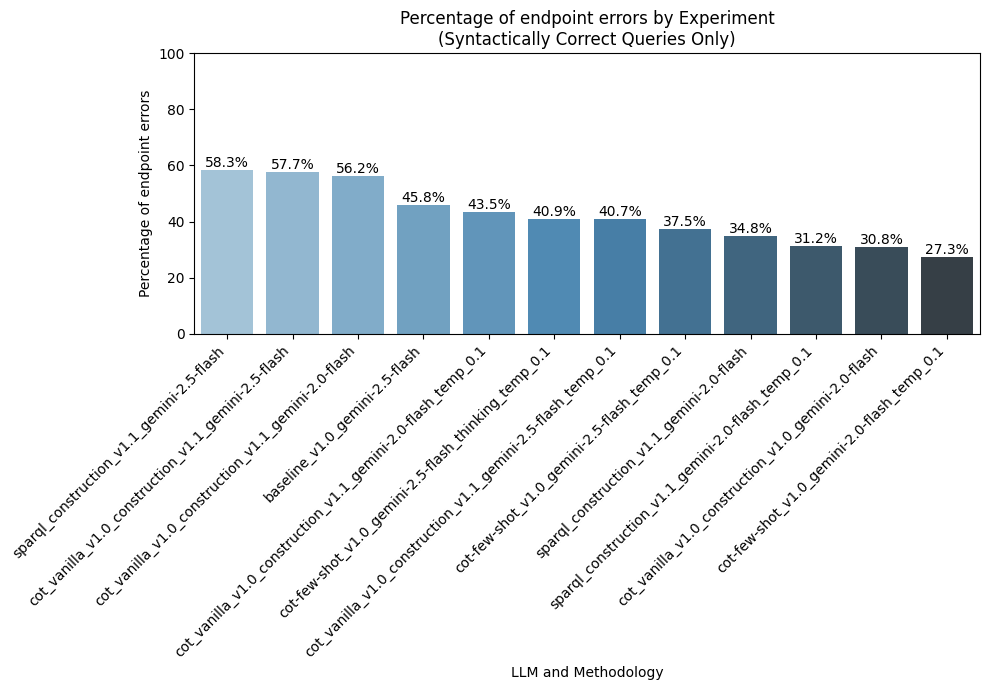

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by percentage for a clearer plot
result_sorted = result.sort_values("percentage_endpoint_error", ascending=False)

plt.figure(figsize=(10, 7))
ax = sns.barplot(
    x="experiment_name_x",
    y="percentage_endpoint_error",
    data=result_sorted,
    palette="Blues_d"
)
plt.ylabel('Percentage of endpoint errors')
plt.xlabel('LLM and Methodology')
plt.title('Percentage of endpoint errors by Experiment\n(Syntactically Correct Queries Only)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Optionally annotate bars with the percentage
for p in ax.patches:
    height = p.get_height()
    # If height is a fraction, multiply by 100
    plt.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

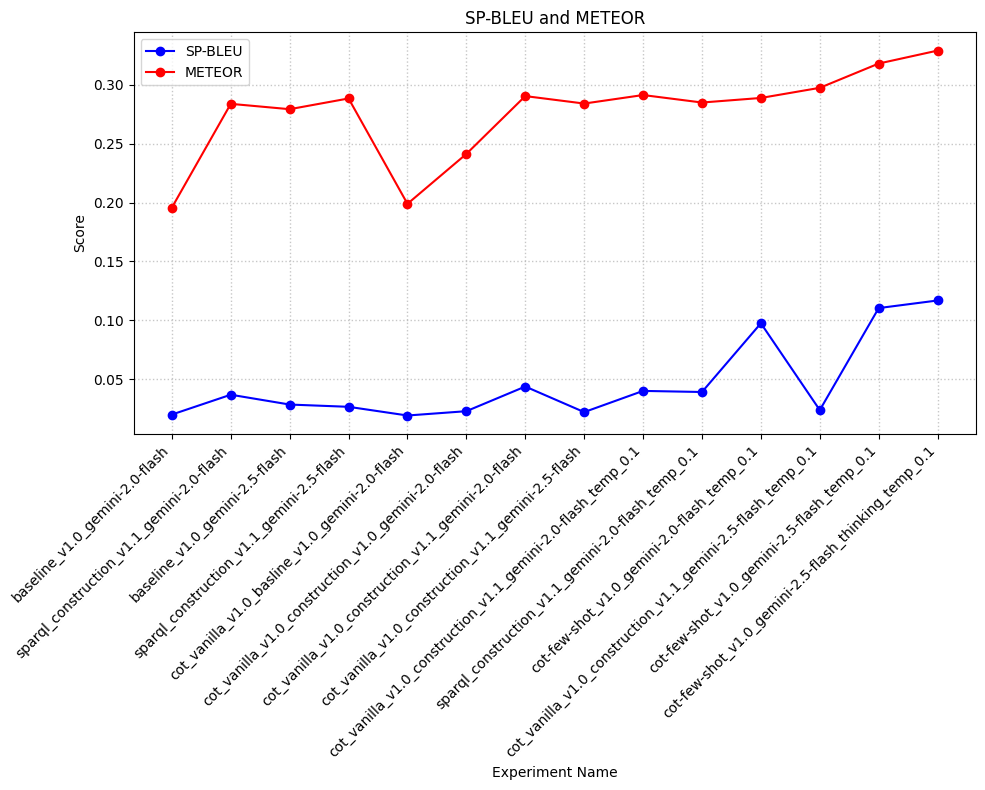

In [61]:
import matplotlib.pyplot as plt

x = df_metric['experiment_name']

plt.figure(figsize=(10, 8))
plt.plot(x, df_metric['SP-BLEU'], marker='o', color='blue', label='SP-BLEU')
plt.plot(x, df_metric['METEOR'], marker='o', color='red', label='METEOR')

plt.xlabel('Experiment Name')
plt.ylabel('Score')
plt.title('SP-BLEU and METEOR')
plt.legend()
plt.grid(True, linestyle=':', linewidth=1, alpha=0.7) 
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [75]:
evaluation_dataset_path_11 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-27_17-31-27/metrics_dataset.json"
df_eval_11 = read_metrics_as_df(evaluation_dataset_path_11)
df_eval_11["experiment_name"] = "cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1"
df_eval_11["evaluation_timestamp"] = "ev_2025-04-27_17-31-27"

evaluation_dataset_path_13 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-27_15-06-28/metrics_dataset.json"
df_eval_13 = read_metrics_as_df(evaluation_dataset_path_13)
df_eval_13["experiment_name"] = "cot-few-shot_v1.0_gemini-2.5-flash_temp_0.1"
df_eval_13["evaluation_timestamp"] = "ev_2025-04-27_15-06-28"

evaluation_dataset_path_14 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-27_16-18-37/metrics_dataset.json"
df_eval_14 = read_metrics_as_df(evaluation_dataset_path_14)
df_eval_14["experiment_name"] = "cot-few-shot_v1.0_gemini-2.5-flash_thinking_temp_0.1"
df_eval_14["evaluation_timestamp"] = "ev_2025-04-27_16-18-37"

evaluation_dataset_path_15 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-27_19-52-47/metrics_dataset.json"
df_eval_15 = read_metrics_as_df(evaluation_dataset_path_15)
df_eval_15["experiment_name"] = "cot-few-shot_v1.0_gemini-2.5-flash_thinking_temp_0.1_run2"
df_eval_15["evaluation_timestamp"] = "ev_2025-04-27_19-52-47"


df_cot_experiments = pd.concat([df_eval_11, df_eval_13, df_eval_14, df_eval_15], ignore_index=True)


In [76]:
df_cot_experiments.head()

,SP-BLEU,METEOR,num_none_queries,size_of_test_set,error_at_endpoints,empty_results_count,syntactically_valid_queries_count,avg_result_including_empty_result_precision,avg_result_including_empty_result_recall,avg_result_including_empty_result_f1,...,avg_result_excluding_empty_result_f1,number_of_query_results_evaluated_excluding_empty_result,list_evaluated_queries_excluding_empty_result,avg_result_all_precision,avg_result_all_recall,avg_result_all_f1,number_of_query_results_evaluated_all,list_evaluated_queries_all,experiment_name,evaluation_timestamp
0,0.097379,0.288834,1,27,6,11,24,0.062500,0.062500,0.062500,...,0.200000,5,"[SwissLipids/16.ttl, SwissLipids/6.ttl, UniPro...",0.037037,0.037037,0.037037,27,[],cot-few-shot_v1.0_gemini-2.0-flash_temp_0.1,ev_2025-04-27_17-31-27
1,0.110294,0.318078,1,28,9,15,25,0.047619,0.066667,0.055556,...,0.416667,2,"[SwissLipids/6.ttl, Rhea/109_Distribution_of_r...",0.025510,0.035714,0.029762,28,[],cot-few-shot_v1.0_gemini-2.5-flash_temp_0.1,ev_2025-04-27_15-06-28
2,0.116757,0.329090,0,28,9,10,23,0.153846,0.153846,0.153846,...,0.666667,3,"[SwissLipids/16.ttl, SwissLipids/6.ttl, UniPro...",0.071429,0.071429,0.071429,28,[],cot-few-shot_v1.0_gemini-2.5-flash_thinking_te...,ev_2025-04-27_16-18-37
3,0.099982,0.319258,1,28,8,9,23,0.051020,0.071429,0.059524,...,0.166667,5,"[SwissLipids/16.ttl, SwissLipids/6.ttl, UniPro...",0.025510,0.035714,0.029762,28,[],cot-few-shot_v1.0_gemini-2.5-flash_thinking_te...,ev_2025-04-27_19-52-47


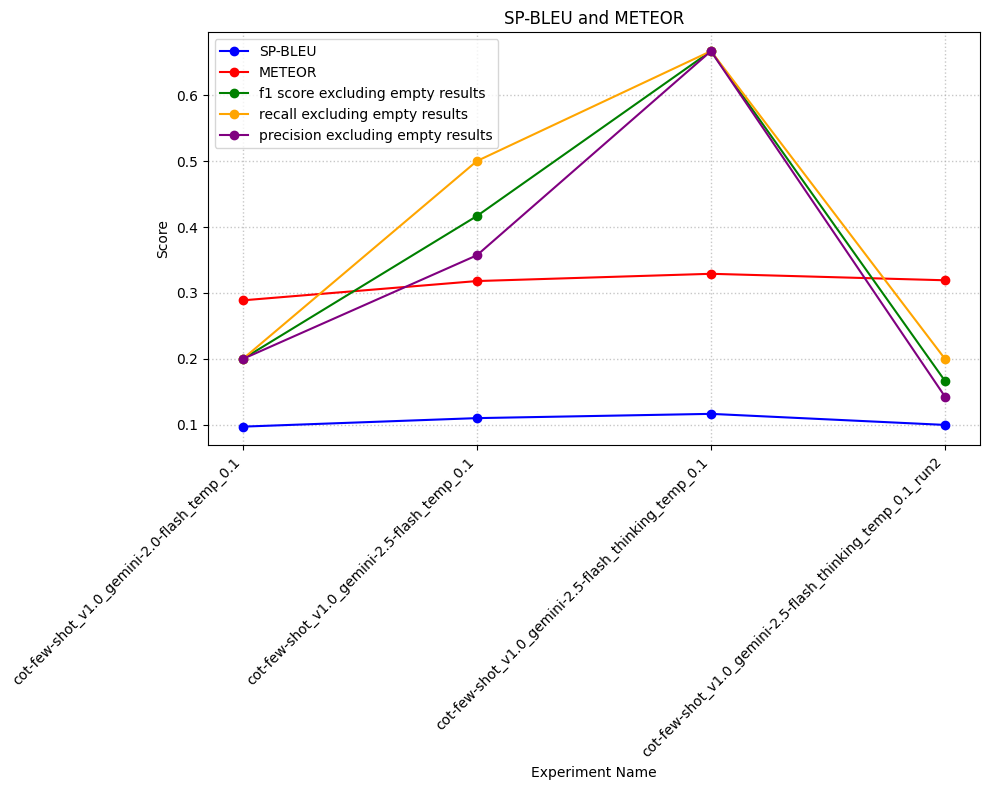

In [77]:
import matplotlib.pyplot as plt

x = df_cot_experiments['experiment_name']

plt.figure(figsize=(10, 8))
plt.plot(x, df_cot_experiments['SP-BLEU'], marker='o', color='blue', label='SP-BLEU')
plt.plot(x, df_cot_experiments['METEOR'], marker='o', color='red', label='METEOR')
plt.plot(x, df_cot_experiments['avg_result_excluding_empty_result_f1'], marker='o', color='green', label='f1 score excluding empty results')
plt.plot(x, df_cot_experiments['avg_result_excluding_empty_result_recall'], marker='o', color='orange', label='recall excluding empty results')
plt.plot(x, df_cot_experiments['avg_result_excluding_empty_result_precision'], marker='o', color='purple', label='precision excluding empty results')

plt.xlabel('Experiment Name')
plt.ylabel('Score')
plt.title('SP-BLEU and METEOR')
plt.legend()
plt.grid(True, linestyle=':', linewidth=1, alpha=0.7) 
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

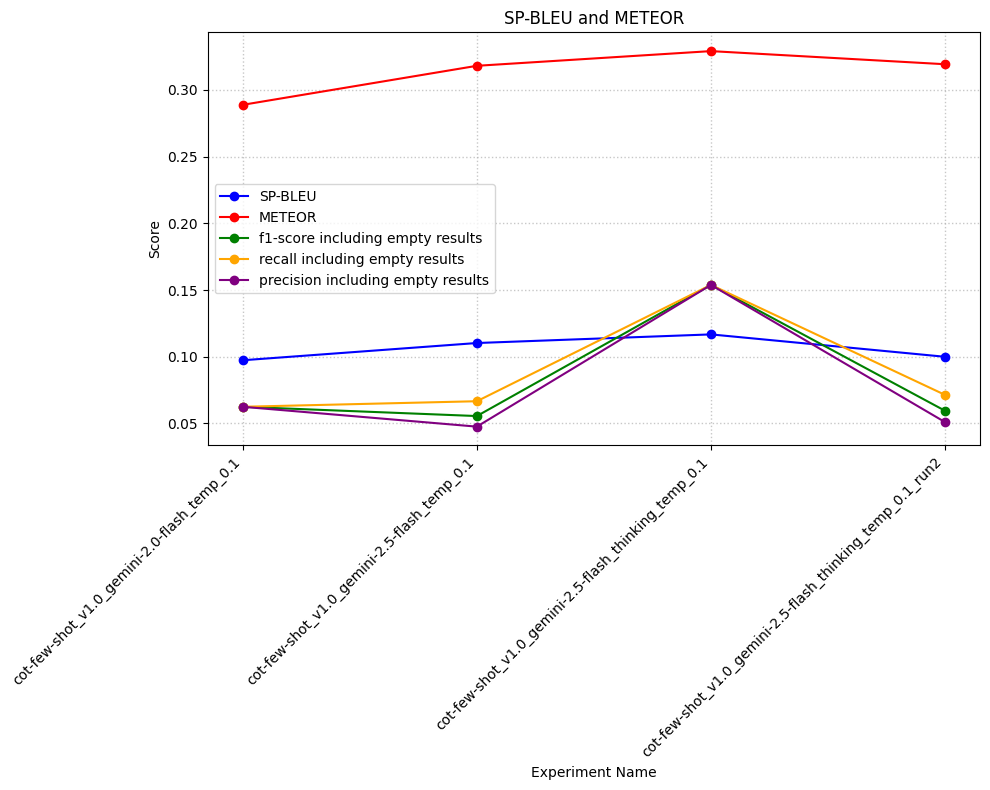

In [78]:
import matplotlib.pyplot as plt

x = df_cot_experiments['experiment_name']

plt.figure(figsize=(10, 8))
plt.plot(x, df_cot_experiments['SP-BLEU'], marker='o', color='blue', label='SP-BLEU')
plt.plot(x, df_cot_experiments['METEOR'], marker='o', color='red', label='METEOR')
plt.plot(x, df_cot_experiments['avg_result_including_empty_result_f1'], marker='o', color='green', label='f1-score including empty results')
plt.plot(x, df_cot_experiments['avg_result_including_empty_result_recall'], marker='o', color='orange', label='recall including empty results')
plt.plot(x, df_cot_experiments['avg_result_including_empty_result_precision'], marker='o', color='purple', label='precision including empty results')


plt.xlabel('Experiment Name')
plt.ylabel('Score')
plt.title('SP-BLEU and METEOR')
plt.legend()
plt.grid(True, linestyle=':', linewidth=1, alpha=0.7) 
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()